In [21]:
import numpy as np
import nmrglue
import matplotlib.pyplot as plt
import pandas as pd

# Important Acqus Parameters
AQ=0.8000000# Acquistion time (s)
SWH=2000 #Spectral Width [Hz]
SF=202.4765750 #Spectrometer frequency [Mhz]
SFO1=202.4751988 #Transmitter frequency [Mhz]
p0=-44.000
p1=0

center=-(SF-SFO1)*10**6
plot_width=100


def analyze_dataset(all_data):
    # Create a DataFrame with real, imaginary, and time values
    time = np.linspace(0, AQ, len(all_data))
    df = pd.DataFrame({
        "Time": time,
        "Real": all_data.real,
        "Imaginary": all_data.imag
    })
    all_data=nmrglue.proc_base.ps(all_data, p0+90, p1) #Why is there an extra 90 here? Probably from ph31 convention?
    
    # Apply exponential apodization
    apodized_data = nmrglue.proc_base.em(all_data, .0004)
    #*********this function can only take real part and not full complex part. Do we want to edit this way?

    ls_and_apodized_data = nmrglue.proc_base.ls(apodized_data, 63)
    # Plot the results
    
    spectrum = nmrglue.proc_base.fft(ls_and_apodized_data) 
    n = len(all_data.real)
    freq = np.linspace(-SWH / 2+center, SWH / 2+center, n) #I am not sure how to calcualte the bounds of the FT here. But this mehtod lines up with Bruker.
    return (freq,np.real(spectrum), np.imag(spectrum))
    

In [22]:
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_13\1000_V6_NS4_2D_2ch\2")[1]

In [23]:
array0, array1, array2, array3 = all_data

array0_processed = analyze_dataset(array0)
array1_processed = analyze_dataset(array1)
array2_processed = analyze_dataset(array2)

x=array0_processed[0]
real_data=array0_processed[1]+array1_processed[1]+array2_processed[1]
imag_data=array0_processed[2]+array1_processed[2]+array2_processed[2]

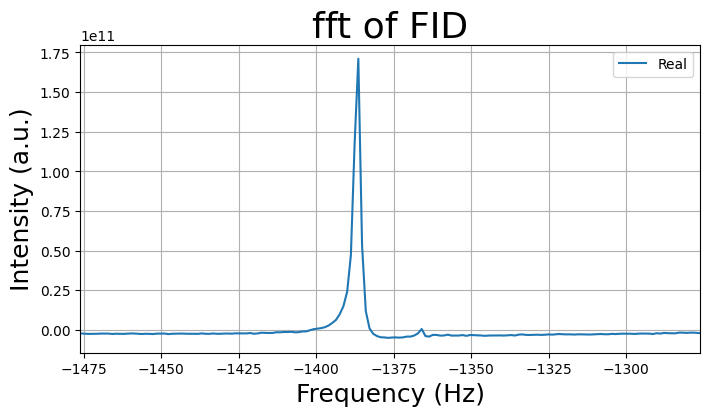

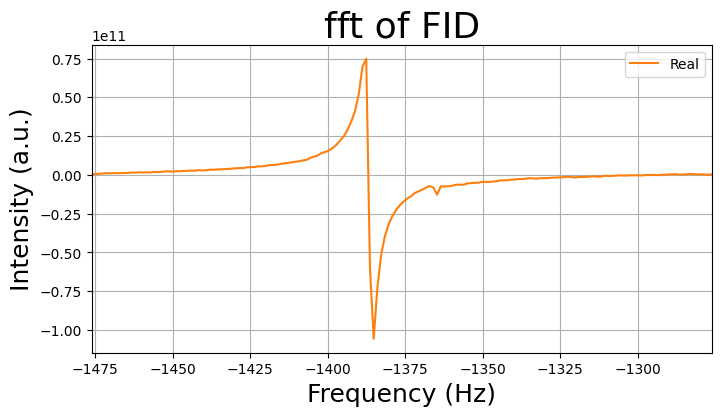

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(x, real_data, label="Real") 
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))   
plt.plot(x, imag_data, label="Real", color="#ff7f0e")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

In [31]:
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_13\1000_V6_NS4_2D_2ch\6")[1]
all_data.shape

array0, array1, array2, array3 = all_data

array0_processed = analyze_dataset(array0)
array1_processed = analyze_dataset(array1)
array2_processed = analyze_dataset(array2)

x=array0_processed[0]
real_data=array0_processed[1]+array1_processed[1]+array2_processed[1]
imag_data=array0_processed[2]+array1_processed[2]+array2_processed[2]

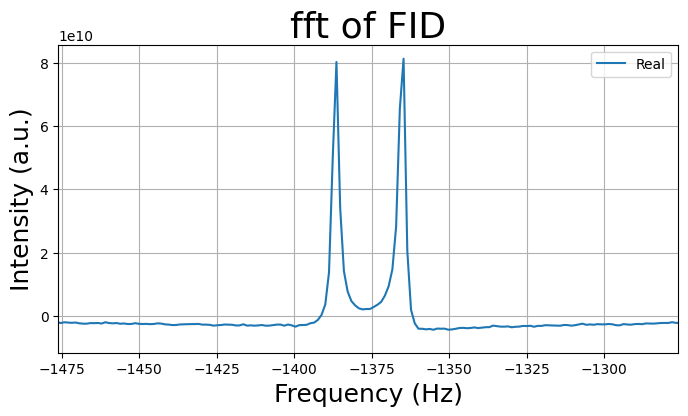

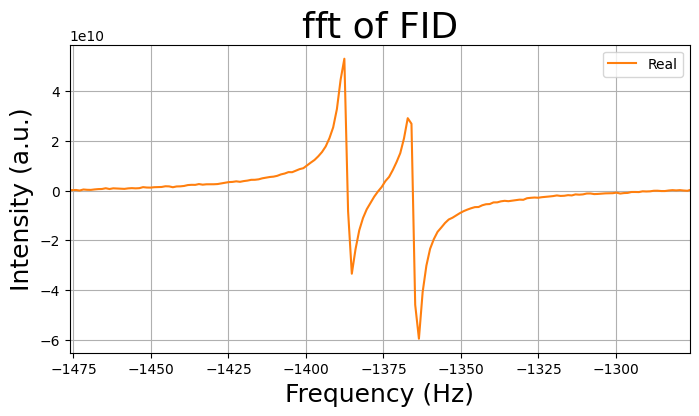

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(x, real_data, label="Real") 
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))   
plt.plot(x, imag_data, label="Real", color="#ff7f0e")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

In [37]:
all_data = nmrglue.bruker.read(r"C:\Users\donny\Desktop\desktop_files\Brown\All_data\pycharm_data\2024_12_13\1000_V6_NS4_2D_2ch\4")[1]
all_data.shape

array0, array1, array2, array3 = all_data

array0_processed = analyze_dataset(array0)
array1_processed = analyze_dataset(array1)
array2_processed = analyze_dataset(array2)

x=array0_processed[0]
real_data=array0_processed[1]+array1_processed[1]+array2_processed[1]
imag_data=array0_processed[2]+array1_processed[2]+array2_processed[2]

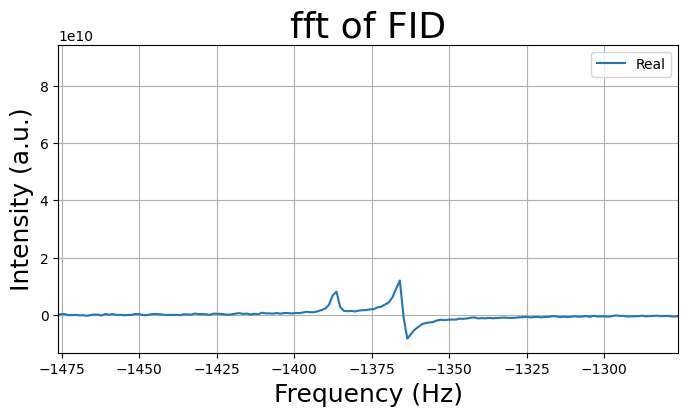

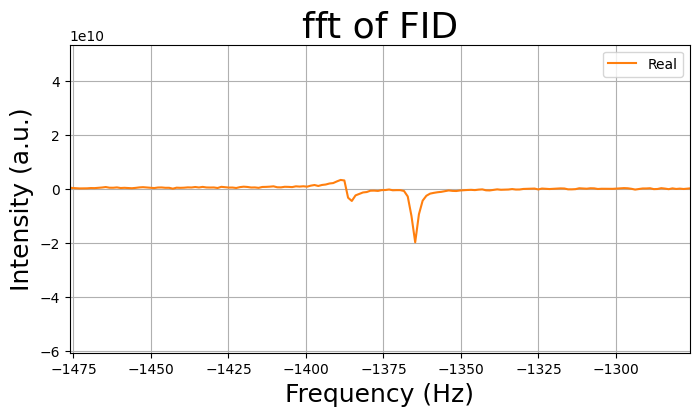

In [38]:
plt.figure(figsize=(8, 4))
plt.plot(x, real_data, label="Real") 
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

plt.figure(figsize=(8, 4))   
plt.plot(x, imag_data, label="Real", color="#ff7f0e")
plt.xlabel("Frequency (Hz)", fontsize=18)
plt.ylabel("Intensity (a.u.)", fontsize=18)
plt.title("fft of FID", fontsize=26)
plt.legend()
plt.grid(True)
#plt.xlim(SFO1+Plot_width,SFO1-Plot_width)
plt.xlim(center-plot_width,center+plot_width)
#plt.gca().invert_xaxis()
plt.show()

In [41]:
array0_processed[2].size

1664